# Example binary mixture histogram combination notebook for FHMCAnalysis
* Author: Nathan A. Mahynski
* Last Modified: 05/02/17

In [1]:
import sys, os
sys.path.append('../../../../')
import FHMCAnalysis.moments.histogram.one_dim.ntot.gc_hist as hG
import FHMCAnalysis.moments.histogram.one_dim.ntot.gc_binary as gB
from matplotlib.patches import Ellipse

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

%matplotlib inline

cl = ['r', 'g', 'b', 'k']
cc = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']

# The Basic Idea Behind It

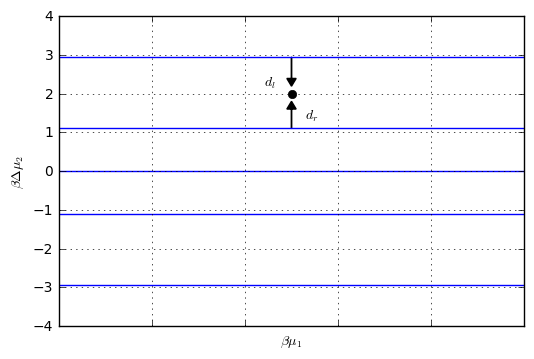

In [2]:
fig = plt.figure()
ax = fig.gca()
plt.ylim(-4,4)
plt.xlim(-10,0)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off')

plt.plot(np.linspace(-10,0,10), 2.94*np.ones(10), 'b')
plt.plot(np.linspace(-10,0,10), 1.1*np.ones(10), 'b')
plt.plot(np.linspace(-10,0,10), 0.0*np.ones(10), 'b')
plt.plot(np.linspace(-10,0,10), -1.1*np.ones(10), 'b')
plt.plot(np.linspace(-10,0,10), -2.94*np.ones(10), 'b')
plt.grid()

plt.ylabel(r'$\beta \Delta \mu_2$')
plt.xlabel(r'$\beta \mu_1$')

plt.plot([-5], [2], 'ko')
plt.arrow(-5, 2.94, 0, -0.55, head_width=.2, head_length=0.2, fc='k', ec='k')
plt.arrow(-5, 1.1, 0, 0.5, head_width=.2, head_length=0.2, fc='k', ec='k')
plt.text(-5.6, 2.2, r'$d_l$')
plt.text(-4.7, 1.35, r'$d_r$')

# Weighted Mixing of Neighbors

In [3]:
dl = np.linspace(0,np.pi,1000)
dr = np.max(dl)-dl

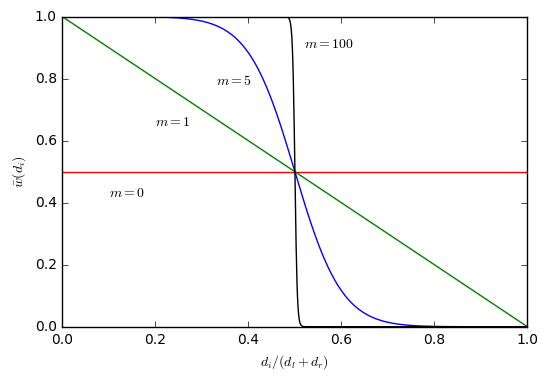

In [4]:
ctr = 0
for m in [0, 1, 5, 100]:
    plt.plot(dl/(dr+dl), dr**m/(dl**m+dr**m), color=cl[ctr])
    ctr += 1
plt.text(0.1, 0.42, r'$m = 0$')
plt.text(0.2, 0.65, r'$m = 1$')
plt.text(0.33, 0.78, r'$m = 5$')
plt.text(0.52, 0.9, r'$m = 100$')

plt.ylabel(r'$\bar{w}(d_i)$')
plt.xlabel(r'$d_i / (d_l + d_r)$')

# Making a (Hyper)Surface

In [5]:
temp = 1.20 # Pick a temperature to work with, T = [0.95, 1.10, 1.20]
order = 2 # Order of extrapolation
smooth = 50 # How many points in N_tot space to smooth lnPI over when looking for maxima

In [6]:
beta_ref = 1.0/temp 
histograms = []
head = './T=%2.2f'%temp
for d in sorted([dd for dd in os.listdir(head) if 'dMu2' in dd]):
    dMu2 = float(d.split('_')[1])
    mu_ref = [0.0, 0.0+dMu2] # Simulations were performed at mu_1 = 0
    composite = head+'/'+d+'/composite.nc'
    hist = hG.histogram (composite, beta_ref, mu_ref, smooth)
    histograms.append((dMu2,hist))

In [7]:
target_beta = 1/1.20 # Choose a target temperature to extrapolate to

## Generate the Surface

In [14]:
iso = gB.isopleth ([x[1] for x in histograms], target_beta, order) # Create the grid (isopleth) object from the available histograms
grid_x1, grid_mu = iso.make_grid_multi([-10, -4.2], [-3.5, 3.5], [0.1, 0.1], m=2.5) # Generate the surface

## Plot the Surface

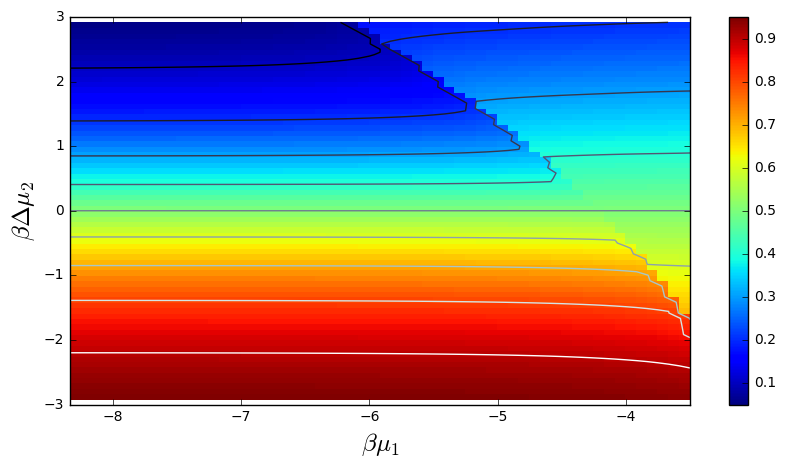

In [9]:
plt.figure(figsize=(10,5))
csf = plt.contourf(grid_mu[0]*target_beta, grid_mu[1]*target_beta, grid_x1, levels=np.linspace(0.05, 0.95, 100))
cs = plt.contour(grid_mu[0]*target_beta, grid_mu[1]*target_beta, grid_x1, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cmap='bone')
plt.ylim(-3,3)
plt.ylabel(r'$\beta \Delta \mu_2$', fontsize=18)
plt.xlabel(r'$\beta \mu_1$', fontsize=18)
pcm = plt.gca().pcolor(grid_mu[0]*target_beta, grid_mu[1]*target_beta, grid_x1,
                   norm=colors.Normalize(vmin=0.05, vmax=0.95))
plt.colorbar(pcm, ax=plt.gca(), shrink=1)

# Error from the Gibbs-Duhem Equation

In [10]:
isobars = np.array([0.01, 0.02, 0.03, 0.04, 0.3, 0.5, 0.7, 0.9]) # Choose a series of different isobars which span the range of pressures found

In [11]:
V = 9.0*9.0*9.0 # Volume of simulation cell in provided data
press = -iso.data['F.E./kT']/V/target_beta # Compute the pressure across the surface

## Plot the Isobars on Surface

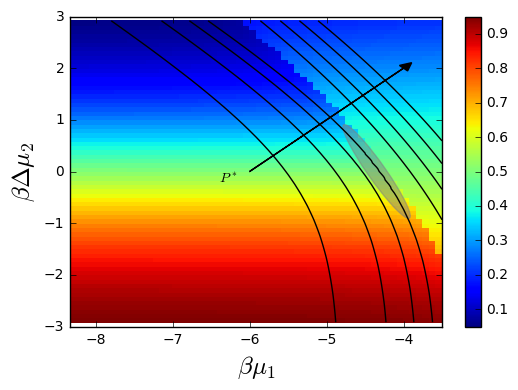

In [12]:
# This command actually extracts the computation and will plot the isobars along which it checked GDE
err2 = gB.check_gibbs_duhem(isobars, grid_x1, press, grid_mu[0]*target_beta, grid_mu[1]*target_beta)

# Plot the surface as background for comparison
plt.ylim(-3,3)
plt.ylabel(r'$\beta \Delta \mu_2$', fontsize=18)
plt.xlabel(r'$\beta \mu_1$', fontsize=18)
plt.arrow(-6, 0.0, 2, 2, head_width=.15, head_length=0.15, fc='k', ec='k')
plt.text(-6.4, -0.22, r'$P^*$')

csf = plt.contourf(grid_mu[0]*target_beta, grid_mu[1]*target_beta, grid_x1, levels=np.linspace(0.05, 0.95, 100))
e = Ellipse(xy=[-4.35,0], width=0.25, height=2, angle=25.0, alpha=0.5, color='gray')
plt.gca().add_artist(e)
pcm = plt.gca().pcolor(grid_mu[0]*target_beta, grid_mu[1]*target_beta, grid_x1,
                   norm=colors.Normalize(vmin=0.05, vmax=0.95))
plt.colorbar(pcm, ax=plt.gca(), shrink=1)

## Plot the Error

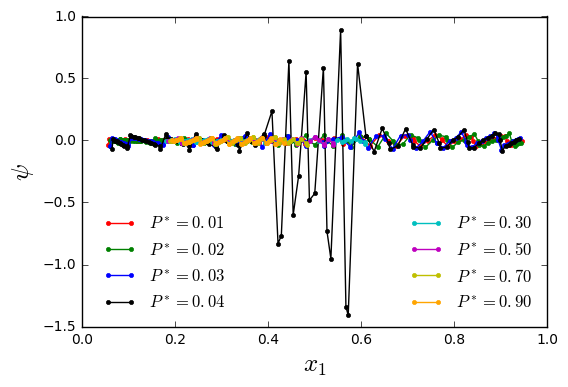

In [13]:
plt.figure()
ctr = 0
for p_, e_, x1_, d_, q_beta in err2:
    trim = 1 # First entry trimmed
    plt.plot(x1_[trim:], e_[trim:], label=r'$P^* = %.2f$'%p_, marker='.', lw=1, color=cc[ctr]) 
    ctr += 1
plt.ylabel(r'$\psi$', fontsize=18)
plt.xlabel(r'$x_1$', fontsize=18)
plt.legend(fontsize=12, ncol=2, frameon=False, columnspacing=11, loc=4)